# 결정 트리

* 숫자를 마음속으로... 

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/5-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 로지스틱 회귀로 와인 분류하기
* 6497개의 와인 샘플 데이터

In [2]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine-date')

In [3]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


* alcoho. sugar, ph은 각각 알코올 도수, 당도, ph 값을 나타냅니다. 
* class는 타깃값으로 0이면 레드 와인, 1이면 화이트 와인입니다. 
* 레드 와인과 화이트 와인을 구분하는 이진 분류 문제이고, 화이트 와인이 양성 클래스. 즉 전체 와인 데이터에서 화이트 와인을 골라내는 문제입니다.

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [5]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [6]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [7]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [8]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


## 표준화

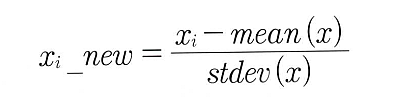

In [9]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [10]:
((train_input[:,0] - train_input[:,0].mean() )/ train_input[:,0].std() ).std()

1.0

In [11]:
train_scaled[:,0].mean()

-2.027036097821675e-14

In [12]:
train_scaled[:,0].var()

1.0000000000000075

In [13]:
train_scaled[:,1].min()

-1.0157512572482073

In [14]:
행복 = 하루걷는거리 + 하루소비금액

NameError: name '하루걷는거리' is not defined

### 정규화
* 정규화는 서로 다른 특성의 크기를 통일하기 위해 크기를 변환
    * 특성 A는 거리를 나타내는 변수 -> 0 ~ 100km 
    * 특성 B는 금액을 나타내는 변수 -> 0 ~ 10,000,000,000원
* 이 두 변수를 모두 동일한 크기 단위로 비교하기 위해서 값을 모두 최소 0 ~ 최대 1 의 값으로 변환 

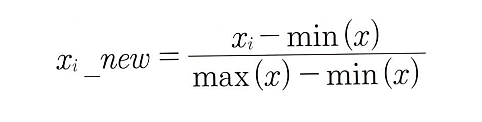

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
ss2 = MinMaxScaler()
ss2.fit(train_input)

train_scaled2 = ss2.transform(train_input)
test_scaled2 = ss2.transform(test_input)

In [17]:
train_scaled2[:,0].min()

0.0

In [18]:
train_scaled2[:,0].max()

1.0

In [19]:
train_scaled2[:,2].mean()

0.3755558552102286

In [20]:
train_scaled2[:,2].std()

0.12567908190975977

In [21]:
for x in range(0,3):
    print (f"feature {x} - min : {train_scaled[:,x].min()}")
    print (f"feature {x} - max : {train_scaled[:,x].max()}")

feature 0 - min : -2.08485396267151
feature 0 - max : 3.119722897938368
feature 1 - min : -1.0157512572482073
feature 1 - max : 12.578566840374403
feature 2 - min : -2.988212911038643
feature 2 - max : 4.968560680910572


In [22]:
for x in range(0,3):
    print (f"feature {x} - min : {train_scaled2[:,x].min()}")
    print (f"feature {x} - max : {train_scaled2[:,x].max()}")

feature 0 - min : 0.0
feature 0 - max : 1.0
feature 1 - min : 0.0
feature 1 - max : 1.0
feature 2 - min : 0.0
feature 2 - max : 1.0


In [23]:
for x in range(0,3):
    print (f"feature {x} - min : {train_input[:,x].min()}")
    print (f"feature {x} - max : {train_input[:,x].max()}")

feature 0 - min : 8.0
feature 0 - max : 14.2
feature 1 - min : 0.6
feature 1 - max : 65.8
feature 2 - min : 2.74
feature 2 - max : 4.01


In [25]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\amoll\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


In [26]:
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import numpy as np

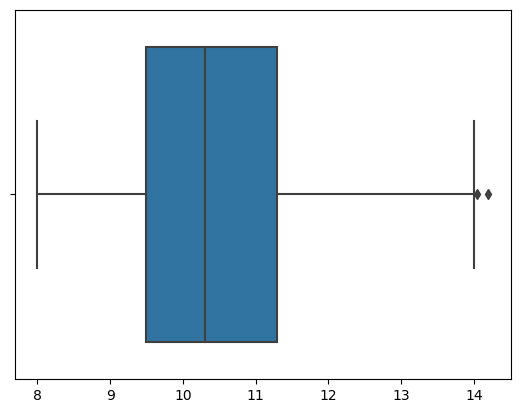

In [27]:
sns.boxplot(x = train_input[:,0])
plt.show()

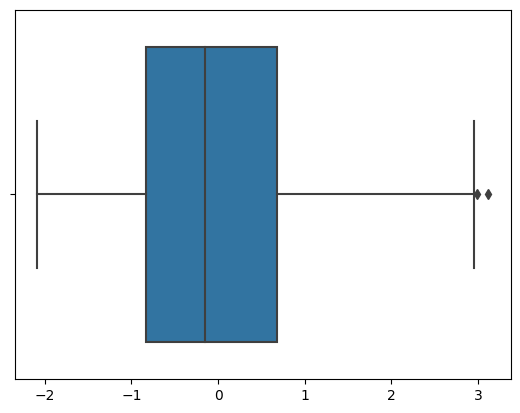

In [28]:
sns.boxplot(x = train_scaled[:,0])
plt.show()

In [29]:
train_input[:,0].mean()

10.483601436726318

In [30]:
train_input[:,0].std()

1.191259187067419

In [31]:
train_scaled[0,0]

0.013765739187312052

In [32]:
mu : 0 sigma : 1 

SyntaxError: invalid syntax (1205372363.py, line 1)

In [33]:
10.483601436726318 + 0.013765739187312052 * 1.191259187067419

10.499999999999977

In [34]:
train_input[0,0]

10.5

In [35]:
train_scaled[(train_scaled[:,0] >= -2) & (train_scaled[:,0] <= 2),0].__len__()

5022

In [36]:
train_scaled[:,0].__len__()

5197

In [37]:
5197 - 5022

175

In [38]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [39]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled2, train_target)

print(lr.score(train_scaled2, train_target))
print(lr.score(test_scaled2, test_target))

0.7756397921878007
0.7823076923076923


### 설명하기 쉬운 모델과 어려운 모델

* 모델을 설명하기 위해 로지스틱 회귀가 학습한 계수와 절편을 출력하겠습니다.

In [40]:
print(lr.coef_, lr.intercept_)

[[ 2.02148281 12.70891206 -5.11806735]] [1.62231]


In [41]:
z = 0.512알코올 + 1.673당도 - 0.687ph + 1.81 

SyntaxError: invalid syntax (2124222771.py, line 1)

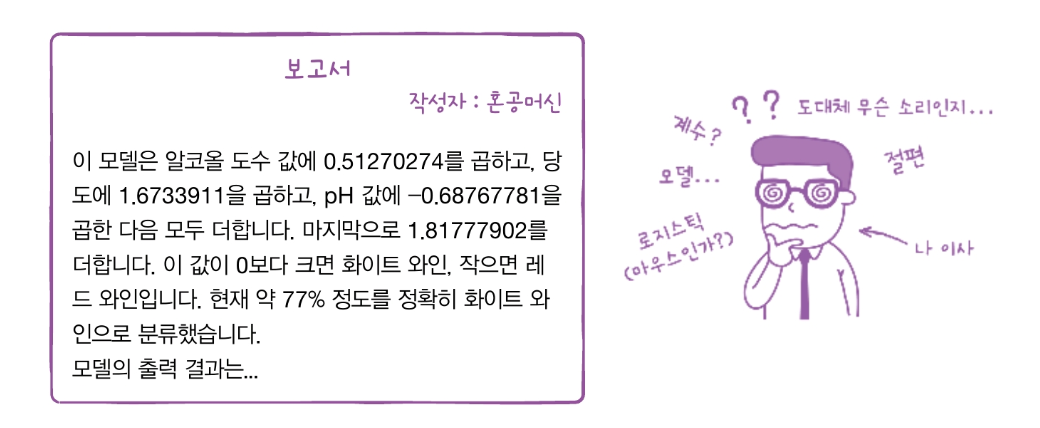

* 알코올 도수와 당도가 높을수록 화이트 와인일 가능성이 높고, ph가 높을수록 레이 와인일 가능성이 높은 것 같습니다. 
* 하지만 정확히 이 숫자가 어떤 의미인지 설명하긴 어렵습니다. 
* 대부분 머신러닝 결과는 설명하기가 어렵습니다. 

## 결정 트리(Decision Tree)

* 결정 트리는 스무고개 게임을 하듯이 결과를 도출합니다. 
* 그렇기 때문에 결과에 대한 설명이 쉽습니다. 

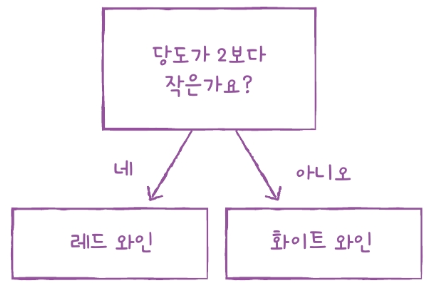

* DecisionTreeClassifier 클래스를 사용하여 결정 트리 모델을 훈련시킬 수 있습니다. 
* fit() 메서드를 호출해서 모델을 훈련한 다음 score() 메서드로 정확도를 평가해보겠습니다.

In [43]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


* plot_tree() 함수를 사용해 결정 트리를 이해하기 쉬운 트리 그림으로 출력해주십니다. 

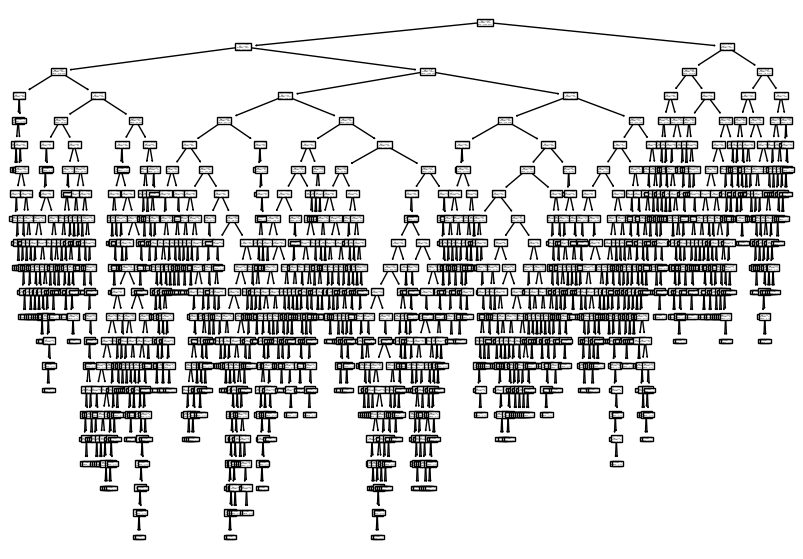

In [45]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

* 맨 위의 노드를 루트 노드, 맨 아래 끝에 달린 노드를 리프 노드라고 합니다. 

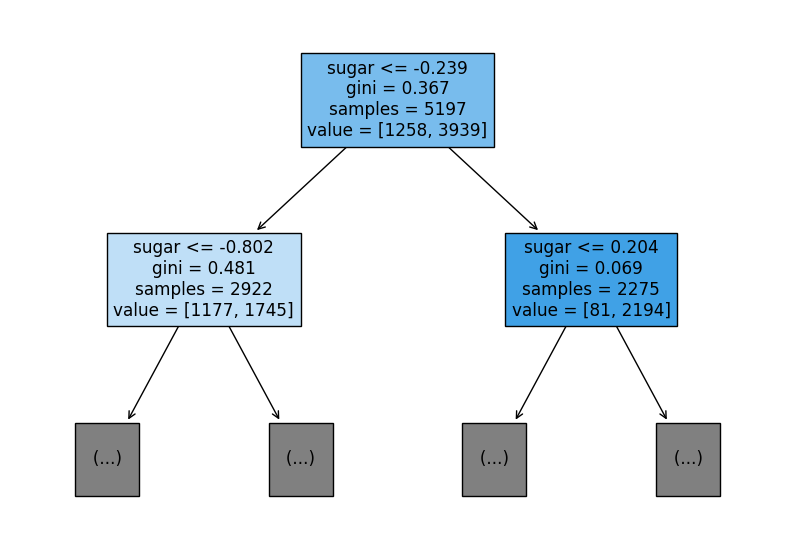

In [46]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

### 불순도 
* gini는 지니 불순도(gini impurity)를 의미합니다. 
* 기본값으로 gini를 사용하고 criterion으로 사용합니다. 
* criterion 매개변수의 용도는 노드에서 데이터를 분할할 기준을 정하는 것입니다. 
* 지니 불순도는 클래스의 비율을 제곱해서 더한 다음 1에서 빼면 됩니다. 

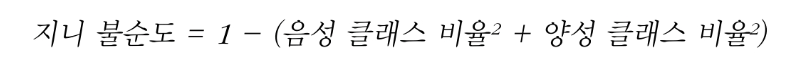

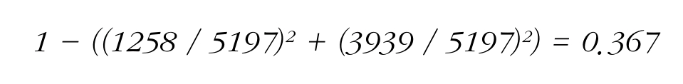

* 만약 100개의 샘플이 있는 어떤 노드의 두 클래스의 비율이 정확히 1/2씩이라면 지니 불순도는 0.5가 되어 최악이 됩니다. 

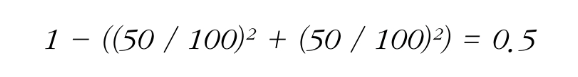

* 노드에 하나의 클래스만 있다면 지니 불순도는 0이 되어 가장 작습니다. 이런 노드를 순수 노드라고 합니다. 

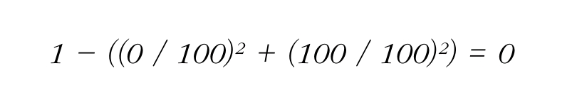

* 결정 트리 모델은 부모 노드와 자식 노드의 불순도 차이가 가능한 크도록 트리를 성장시킵니다. 
* 부모 노드와 자식 노드의 불순도 차이를 계산하는 방법에 대해서 알아보겠습니다. 

* 1. 먼저 자식 노드의 불순도를 샘플 개수에 비례하여 모두 더합니다. 그 다음 부모 노드의 불순도에서 빼면 됩니다. 

* 위의 예제에서 왼쪽 노드로 2922개 샘플이 이동했고, 오른ㅉ고 노드로는 2275개의 샘플이 이동했습니다. 

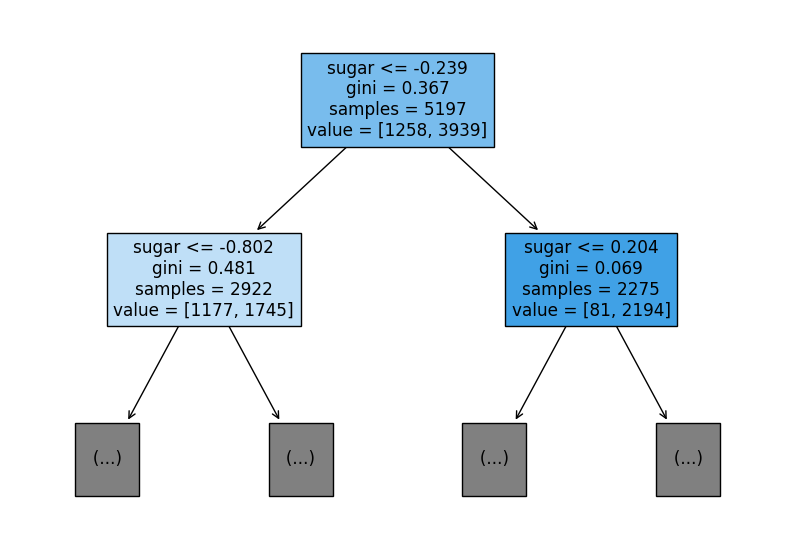

In [47]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

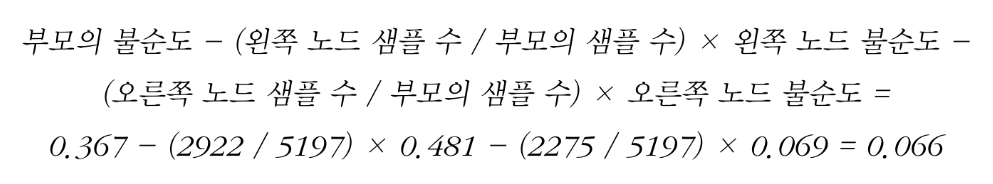

* 이런 부모와 자식 노드 사이의 불순도 차이를 정보 이득(information gain)이라고 부릅니다. 
* 이 알고리즘은 정보 이득이 최대가 되도록 데이터를 나눕니다. 

### 엔트로피
* 엔트로피(entropy)를 지정하여 엔트로피 불순도를 사용할 수 있습니다. 
* 엔트로피 불순도 노드의 클래스 비율을 사용하지만 지니 불순도처럼 제곱이 아니라 밑이 2인 로그를 사용하여 곱합니다. 

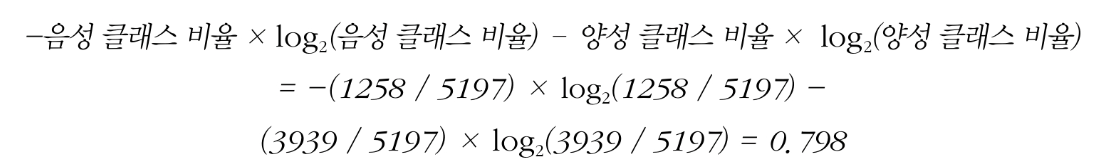

### 가지치기

* 트리 모델을 일반화를 하기 위해서 간단한 방법이 가지치기입니다. 
* 트리의 최대 깊이를 지정해보겠습니다. 

In [48]:
pd.DataFrame(train_scaled).describe()

,0,1,2
count,5.197000e+03,5.197000e+03,5.197000e+03
mean,-2.027036e-14,-8.199885e-16,8.190998e-15
std,1.000096e+00,1.000096e+00,1.000096e+00
min,-2.084854e+00,-1.015751e+00,-2.988213e+00
25%,-8.256821e-01,-7.655491e-01,-6.700978e-01
50%,-1.541238e-01,-5.153469e-01,-4.358016e-02
75%,6.853240e-01,5.688625e-01,6.455892e-01
max,3.119723e+00,1.257857e+01,4.968561e+00


In [49]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


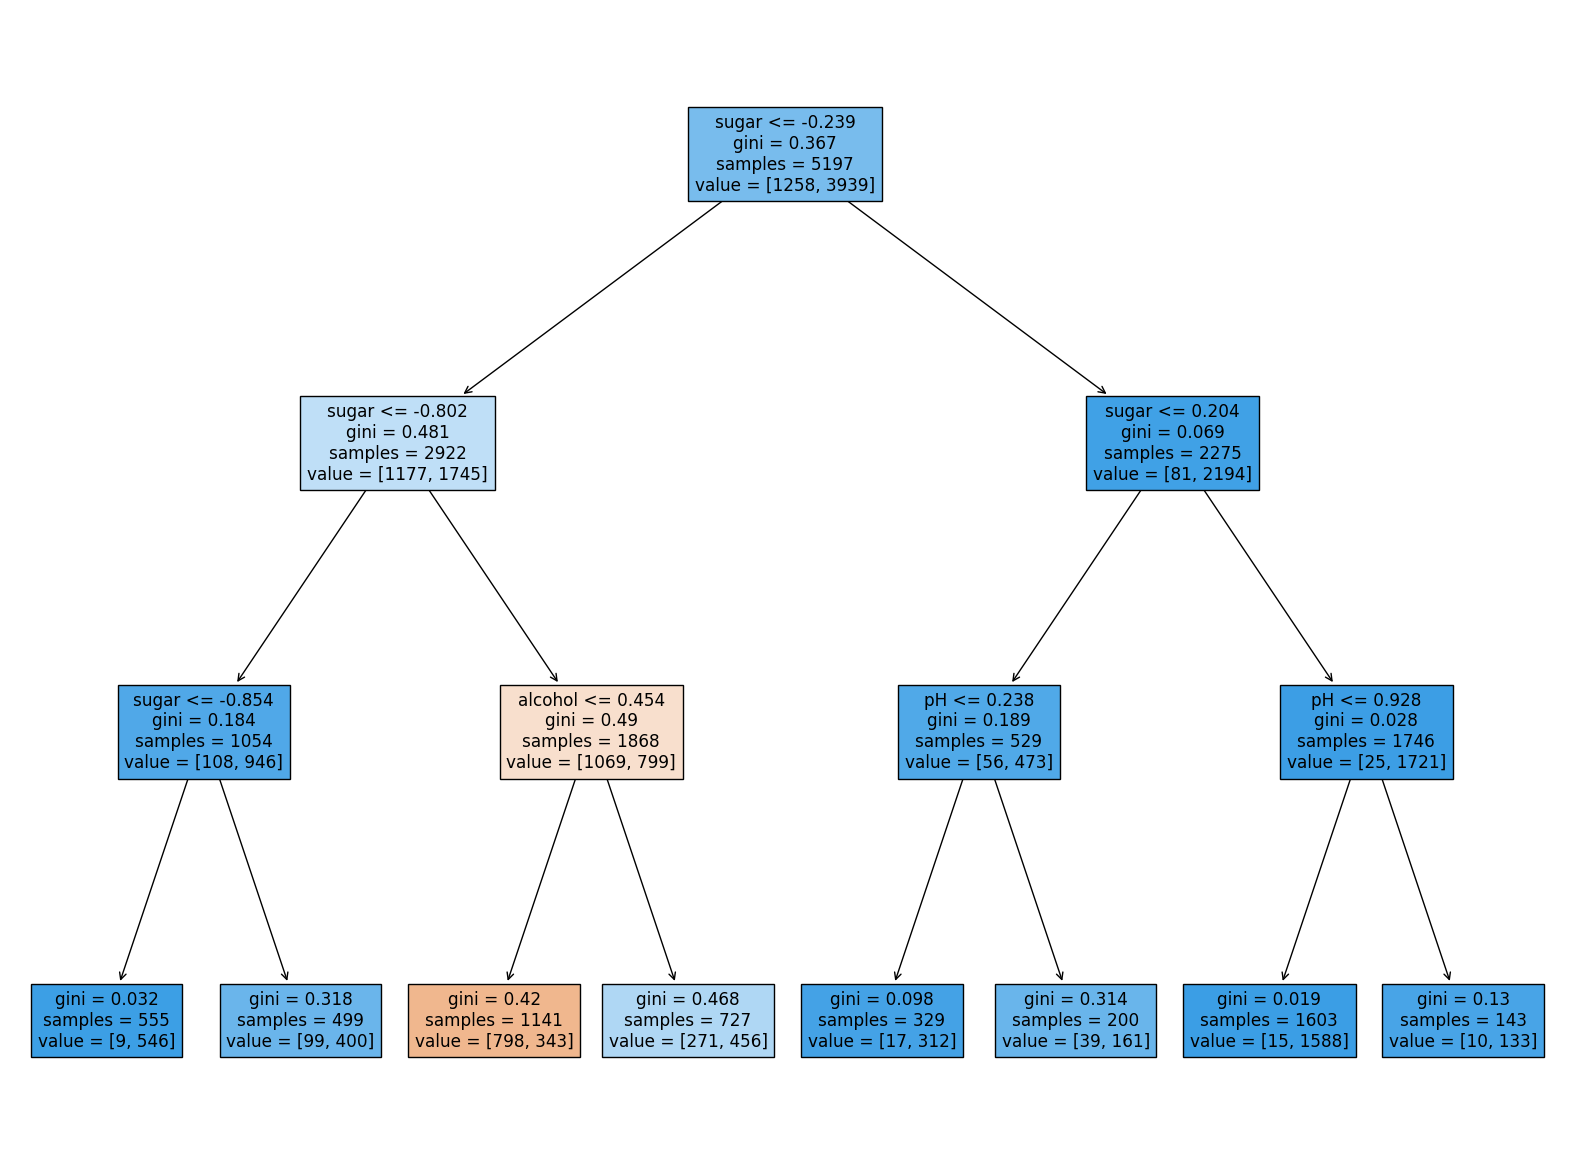

In [50]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

* 왼쪽에서 3번째 노드만 음성 클래스가 많습니다. 이 노드에 도착해야만 레드 와인으로 예측합니다. 

### 결정 트리는 데이터의 표준화를 하지 않습니다.

In [51]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


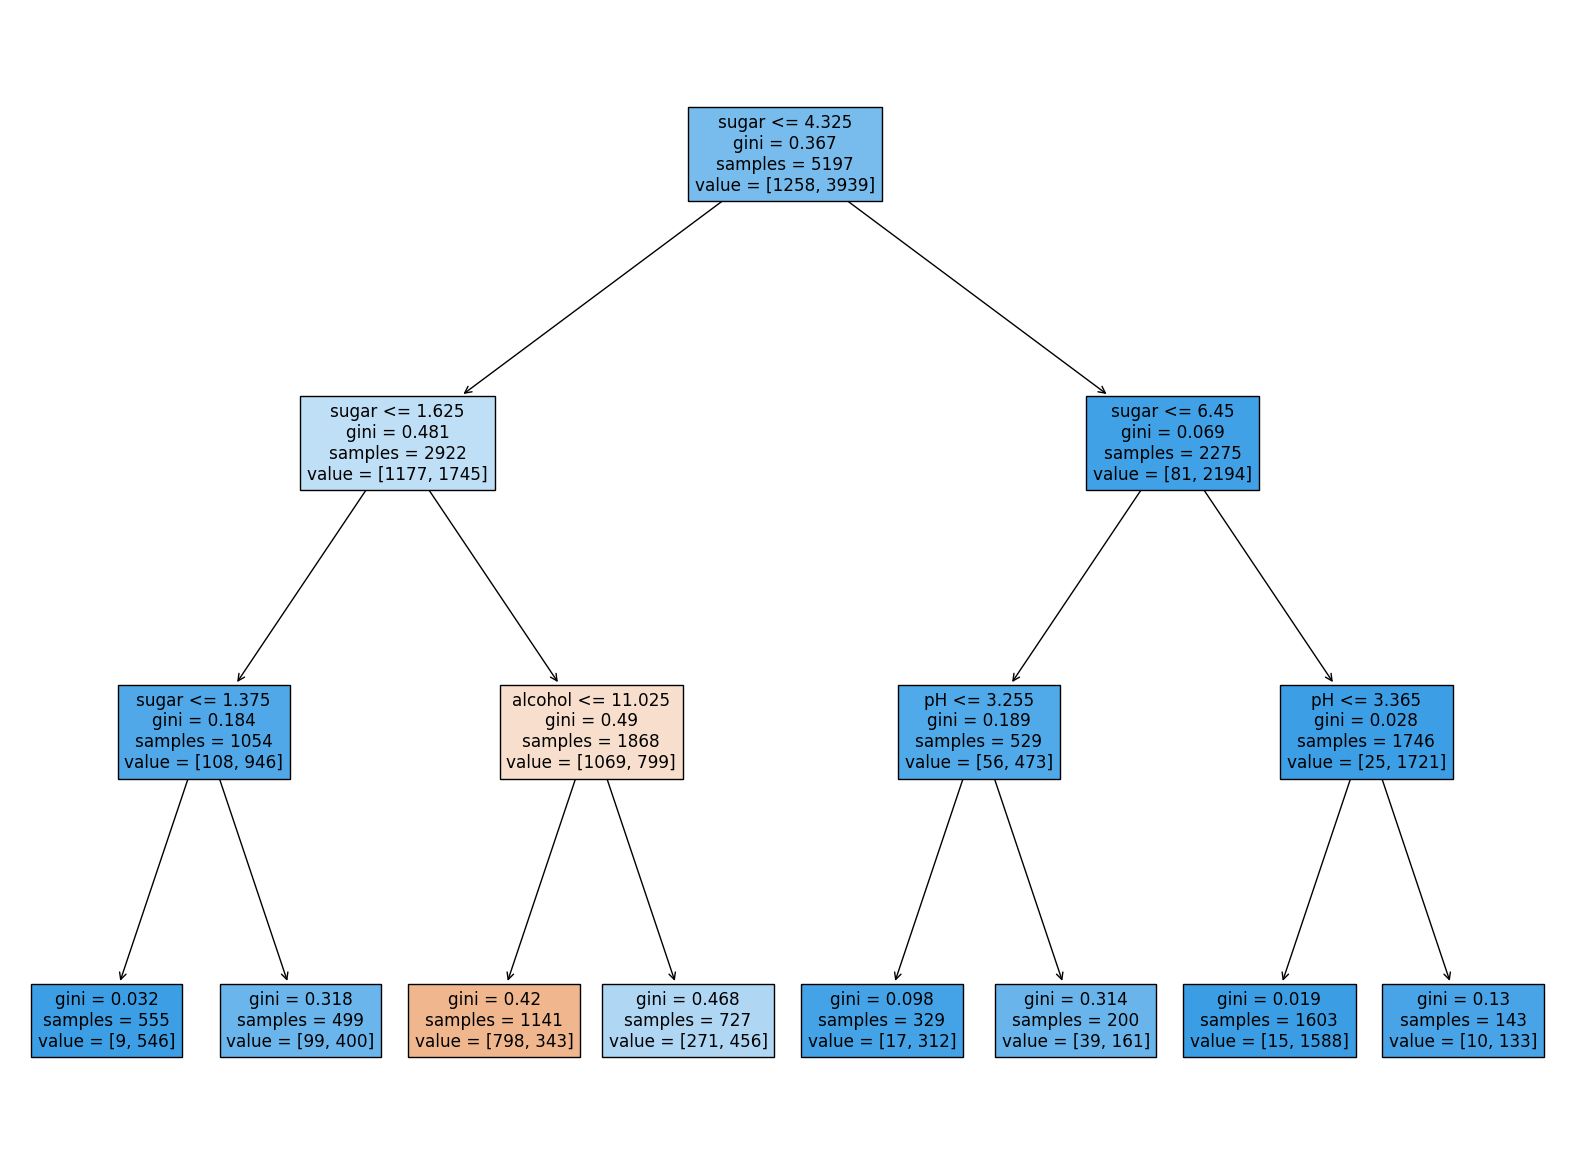

In [52]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

### 중요 변수 추출하기 
* 결정 트리 모델의 feature_importances_ 속성에는 특성의 중요도가 숫자로 기록되어 있습니다.

In [53]:
dict(zip(wine.columns[:3], dt.feature_importances_))

{'alcohol': 0.12345625703073809,
 'sugar': 0.8686293409940407,
 'pH': 0.007914401975221242}

In [54]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]
